# Data Preparation

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
from pandas_datareader.yahoo.daily import YahooDailyReader
import yfinance as yf

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['GOOG','MSFT']

# Set up End and Start times for data grab

end = datetime.now()
start = datetime(end.year - 2, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [GOOG, MSFT]
company_name = ["GOOGLE", "MSFT"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-02-17,259.390015,260.089996,256.000000,258.059998,258.059998,29979600,MSFT
2023-02-21,254.479996,255.490005,251.589996,252.669998,252.669998,28397400,MSFT
2023-02-22,254.089996,254.339996,250.339996,251.509995,251.509995,22491100,MSFT
2023-02-23,255.559998,256.839996,250.479996,254.770004,254.770004,29219100,MSFT
2023-02-24,249.960007,251.000000,248.100006,249.220001,249.220001,24990900,MSFT
2023-02-27,252.460007,252.820007,249.389999,250.160004,250.160004,21190000,MSFT
2023-02-28,249.070007,251.490005,248.729996,249.419998,249.419998,22491000,MSFT
2023-03-01,250.759995,250.929993,245.789993,246.270004,246.270004,27565300,MSFT
2023-03-02,246.550003,251.399994,245.610001,251.110001,251.110001,24808200,MSFT


In [2]:
GOOG.describe()

,Open,High,Low,Close,Adj Close,Volume
count,504.000000,504.000000,504.000000,504.000000,504.000000,5.040000e+02
mean,120.126100,121.513120,118.774674,120.142421,120.142421,2.695574e+07
std,18.277129,18.196058,18.182458,18.184906,18.184906,1.060280e+07
min,85.510002,86.550003,83.449997,83.489998,83.489998,8.567800e+06
25%,103.568499,104.691586,102.357689,103.589998,103.589998,2.013650e+07
50%,118.453999,119.931000,117.117699,118.825001,118.825001,2.461250e+07
75%,137.111145,138.404129,135.722248,137.012375,137.012375,3.103952e+07
max,151.863495,152.100006,149.887497,150.709000,150.709000,9.779860e+07


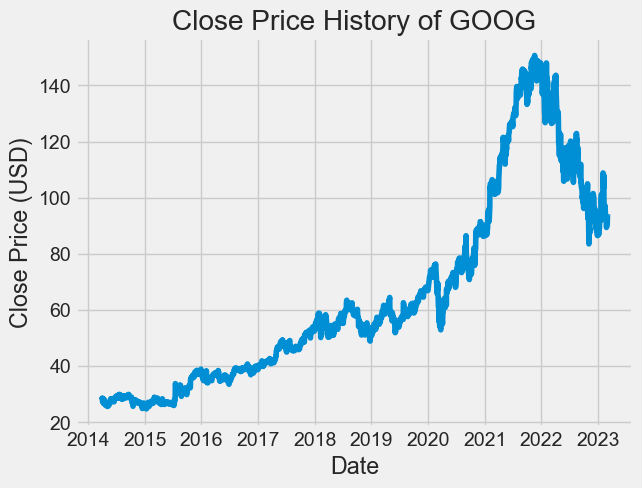

In [3]:
df = DataReader('GOOG', data_source='stooq', start='2014-01-01', end=datetime.now())
plt.title('Close Price History of GOOG')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.show()

In [4]:
data = df.filter(items=['Close'])[-1::-1]
dataset = data.values
training_data_len = int(np.ceil(len(dataset) * 0.8))
training_data_len

1800

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02613786],
       [0.02674461],
       [0.02554697],
       ...,
       [0.52253899],
       [0.53681547],
       [0.55037813]])

## Training Data

In [6]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []


dat_size = 100

for i in range(dat_size, len(train_data)):
    x_train.append(train_data[i-dat_size:i, 0])
    y_train.append(train_data[i, 0])
    if i<= dat_size+1:
        #print(x_train)
        #print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1700, 100, 1)

## Testing Data

In [7]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - dat_size: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = scaled_data[training_data_len:, :]
for i in range(dat_size, len(test_data)):
    x_test.append(test_data[i-dat_size:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
y_test.shape

(450, 1)

## Saving training and testing data

In [8]:
train_data = pd.DataFrame(x_train.reshape((1700, 100)))
test_data = pd.DataFrame()
test_data

""


In [9]:
y_train.shape
train_data = np.concatenate((x_train.reshape((1700, 100)), y_train.reshape(1700, 1)), axis=1)
train_data = pd.DataFrame(train_data)
train_data.rename(columns={list(train_data)[-1]: "Y"}, inplace=True)


test_data = np.concatenate((x_test.reshape((450, 100)), y_test.reshape(450, 1)), axis=1)
test_data = pd.DataFrame(test_data)
test_data.rename(columns={list(test_data)[-1]: "Y"}, inplace=True)


train_data.to_csv('train_data.csv')
test_data.to_csv('test_data.csv')

train_data

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,Y
0,0.026138,0.026745,0.025547,0.029588,0.029525,0.030611,0.020062,0.018084,0.024726,0.028390,...,0.029275,0.028081,0.030226,0.029874,0.027831,0.032610,0.032558,0.032094,0.035537,0.037400
1,0.026745,0.025547,0.029588,0.029525,0.030611,0.020062,0.018084,0.024726,0.028390,0.019194,...,0.028081,0.030226,0.029874,0.027831,0.032610,0.032558,0.032094,0.035537,0.037400,0.036461
2,0.025547,0.029588,0.029525,0.030611,0.020062,0.018084,0.024726,0.028390,0.019194,0.015089,...,0.030226,0.029874,0.027831,0.032610,0.032558,0.032094,0.035537,0.037400,0.036461,0.036016
3,0.029588,0.029525,0.030611,0.020062,0.018084,0.024726,0.028390,0.019194,0.015089,0.015851,...,0.029874,0.027831,0.032610,0.032558,0.032094,0.035537,0.037400,0.036461,0.036016,0.035695
4,0.029525,0.030611,0.020062,0.018084,0.024726,0.028390,0.019194,0.015089,0.015851,0.017405,...,0.027831,0.032610,0.032558,0.032094,0.035537,0.037400,0.036461,0.036016,0.035695,0.034759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,0.497833,0.491135,0.494450,0.488156,0.491678,0.494244,0.509012,0.502124,0.494510,0.499411,...,0.760449,0.754516,0.738288,0.739280,0.749043,0.755912,0.733299,0.720252,0.692619,0.701693
1696,0.491135,0.494450,0.488156,0.491678,0.494244,0.509012,0.502124,0.494510,0.499411,0.490036,...,0.754516,0.738288,0.739280,0.749043,0.755912,0.733299,0.720252,0.692619,0.701693,0.723187
1697,0.494450,0.488156,0.491678,0.494244,0.509012,0.502124,0.494510,0.499411,0.490036,0.495065,...,0.738288,0.739280,0.749043,0.755912,0.733299,0.720252,0.692619,0.701693,0.723187,0.725265
1698,0.488156,0.491678,0.494244,0.509012,0.502124,0.494510,0.499411,0.490036,0.495065,0.492832,...,0.739280,0.749043,0.755912,0.733299,0.720252,0.692619,0.701693,0.723187,0.725265,0.718143


In [10]:
test_data.shape

(450, 101)

In [11]:
train_data.shape

(1700, 101)

In [12]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.layers import RNN, LSTMCell
from tensorflow.keras.backend import dot
from tensorflow.keras import activations, initializers
from keras.models import Sequential
from keras.layers import Dense, LSTM
import os
'''print(os.environ['XLA_FLAGS'])
os.environ["CUDA_VISIBLE_DEVICES"] = "0"'''

'print(os.environ[\'XLA_FLAGS\'])\nos.environ["CUDA_VISIBLE_DEVICES"] = "0"'

In [13]:
import pennylane as qml
from pennylane import optimize
import matplotlib.pyplot as plt

In [14]:
tf.keras.backend.set_floatx('float32')
#tf.config.list_physical_devices('GPU')

# Preparing Quantum memory layer

In [15]:
from CV_quantum_layers import CV_Encoding, CV_Measurement, Activation_Layer
from CV_quantum_layers import build_cv_quantum_node, QuantumLayer_MultiQunode

In [16]:
encode_AP = CV_Encoding('Amplitude_Phase')
Qrelu = Activation_Layer('ReLU', encode_AP)
Qsig = Activation_Layer('Sigmoid', encode_AP)
Qtanh = Activation_Layer('TanH', encode_AP)

### Circuit definition

In [17]:
cutoff = 5

dev = qml.device('strawberryfields.tf', wires=4, cutoff_dim=cutoff)
@qml.qnode(dev, interface='tf')
def qnode(inputs, y_ft, itC):

    '''SQUEEZE INITIALIZATION'''
    # Use previous expectation values to create a squeezed vacuum state for each qumode
    for i in range(4):
        qml.Squeezing(inputs[0][i], 0.0, wires=i) 


    '''ROTATION LAYER'''
    # shape of y_ft: (1,4), values have been hard sigmoided
    # ex. [[0.1, 1, 0.5, 0]]

    #scaling to [0,2π]
    y_ft = 2 * np.pi * y_ft

    for i in range(4):
        qml.Rotation(y_ft[0][i], wires=i)


    '''DISPLACEMENT LAYER'''
    # shape of itC: (1,4), values have been hard sigmoided

    # scale itC to half of cutoff dimension to help with normalization
    itC = itC * cutoff / 2

    for i in range(4):
        qml.Displacement(itC[0][i], 0.0, wires=i)
        

    '''MEASUREMENT'''

    return [qml.expval(qml.X(i)) for i in range(4)]



#Defining memory_update as a keras layer
weight_shapes = {"y_ft": (1, 4), "itC": (1, 4)}

qlayer = qml.qnn.KerasLayer(qnode, weight_shapes, output_dim=4, batch_idx=0)

# Defining our network

In [18]:
class LSTM(tf.keras.layers.Layer):
    def __init__(self, units, cutoff, **kwargs):
        self.units = units
        self.state_size = [self.units, self.units]
        
        self.activation = activations.get('tanh')
        self.recurrent_activation = activations.get('hard_sigmoid')
        self.kernel_initializer = initializers.get('glorot_uniform')
        self.recurrent_initializer = initializers.get('orthogonal')
        self.bias_initializer = initializers.get('zeros')
        
              
        self.cutoff = cutoff
        self.dev = qml.device('strawberryfields.tf', wires=self.units, cutoff_dim=self.cutoff)
        
        
        super(LSTM, self).__init__(**kwargs)
    
    def build_qnode(self):
        @qml.qnode(self.dev, interface='tf')
        def qnode(inputs):
            c = inputs[0:self.units]
            y_ft = inputs[self.units:2*self.units]
            itC = inputs[2*self.units:3*self.units]
            
            
            '''SQUEEZE INITIALIZATION'''
            # Use previous expectation values to create a squeezed vacuum state for each qumode
            for i in range(self.units):
                qml.Squeezing(c[i], 0.0, wires=i) 


            '''ROTATION LAYER'''
            # shape of y_ft: (1,4), values have been hard sigmoided
            # ex. [[0.1, 1, 0.5, 0]]

            #scaling to [0,2π]
            y_ft = 2 * np.pi * y_ft

            for i in range(self.units):
                qml.Rotation(y_ft[i], wires=i)


            '''DISPLACEMENT LAYER'''
            # shape of itC: (1,4), values have been hard sigmoided

            # scale itC to half of cutoff dimension to help with normalization
            itC = itC * cutoff / 10

            for i in range(self.units):
                qml.Displacement(itC[i], 0.0, wires=i)


            '''MEASUREMENT'''

            return [qml.expval(qml.X(i)) for i in range(self.units)]
        return qnode
    
    def build(self, input_shape):
        self.ft = self.add_weight(shape=(input_shape[-1] + self.units, self.units),
                                      initializer=self.kernel_initializer,
                                      name='ft')
        self.ft_b = self.add_weight(shape=(self.units),
                                      initializer=self.bias_initializer,
                                      name='ft_b')
        self.c = self.add_weight(shape=(input_shape[-1] + self.units, self.units),
                                      initializer=self.kernel_initializer,
                                      name='ct')
        self.c_b = self.add_weight(shape=(self.units),
                                      initializer=self.bias_initializer,
                                      name='c_b')
        self.o = self.add_weight(shape=(input_shape[-1] + self.units, self.units),
                                      initializer=self.kernel_initializer,
                                      name='ot')
        self.o_b = self.add_weight(shape=(self.units),
                                      initializer=self.bias_initializer,
                                      name='o_b')
        self.it = self.add_weight(shape=(input_shape[-1] + self.units, self.units),
                                      initializer=self.kernel_initializer,
                                      name='it')
        self.it_b = self.add_weight(shape=(self.units),
                                      initializer=self.bias_initializer,
                                      name='i_b')
        
        self.built = True
        
        #Defining memory_update as a keras layer
        weight_shapes= {}
        qnode = self.build_qnode()

        self.qlayer = qml.qnn.KerasLayer(qnode, 
                                         weight_shapes=weight_shapes, 
                                         output_dim=self.units,
                                         trainable=False)
        self.qnode = qnode

    def call(self, inputs, states):
        h,c = states[0], states[1]
        
        x = tf.concat([h,inputs], axis=-1)
        
        y_ft = self.recurrent_activation(dot(x, self.ft) + self.ft_b)
        
        y_it = self.recurrent_activation(dot(x, self.it) + self.it_b)
        
        y_c = self.activation(dot(x, self.c) + self.c_b)
        
        itC = y_it * y_c
        
        
        '''
        QUANTUM MEMORY SEGMENT:
        '''
        # returns expectation values from quantum memory circuit
        q_inputs = tf.concat([c,y_ft,itC], axis=-1)
        c_list = self.qlayer(q_inputs)
        #c = tf.reshape(c_list, (1, self.units))
        c = c_list
        
        y_o = self.recurrent_activation(dot(x, self.o) + self.o_b)
        
        
        h = y_o * self.activation(c)
        
        output = h
        
        return output, [h,c]

In [19]:
weight_shapes

{'y_ft': (1, 4), 'itC': (1, 4)}

In [20]:
model = RNN(LSTM(2, 3), return_sequences=False)
inputs = tf.ones([2,1,2])
model(inputs)

C:\Users\rjrob\anaconda3\envs\cvqml\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
C:\Users\rjrob\anaconda3\envs\cvqml\lib\site-packages\strawberryfields\program.py:732: UserWarning: The circuit consists of 2 disconnected components.
C:\Users\rjrob\anaconda3\envs\cvqml\lib\site-packages\strawberryfields\program.py:732: UserWarning: The circuit consists of 2 disconnected components.


<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.02588824, 0.25115365],
       [0.02588824, 0.25115365]], dtype=float32)>

# Compiling/Training the model

In [25]:

# Build the LSTM model
#cell = LSTM(8)
#layer = RNN(cell, return_sequences=True)

cell2 = LSTM(3, 4)   # first argument needs to be 4 (number of wires)
layer2 = RNN(cell2, return_sequences=False)
model = Sequential()
#model.add(layer)
model.add(layer2)
model.add(Dense(35))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', run_eagerly=True)

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Cause: Unable to locate the source code of <function LSTM.build_qnode.<locals>.qnode at 0x000001AD3D754040>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: source code not available
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function LSTM.build_qnode.<locals>.qnode at 0x000001AD3D754040>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: source code not available
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function LSTM.build_qnode.<locals>.qnode at 0x000001AD3D754040>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: source code not available
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function _lambdifygenerated at 0x000001AD3D7E52D0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this war

Cause: Unable to locate the source code of <function _lambdifygenerated at 0x000001AD3D7E52D0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function _lambdifygenerated at 0x000001AD3D7E52D0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\rjrob\anaconda3\envs\cvqml\lib\site-packages\keras\backend.py", line 5129, in <genexpr>
    output_ta_t = tuple(  File "C:\Users\rjrob\anaconda3\envs\cvqml\lib\site-packages\tensorflow\python\util\tf_should_use.py",

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\rjrob\anaconda3\envs\cvqml\lib\site-packages\keras\backend.py", line 5129, in <genexpr>
    output_ta_t = tuple(  File "C:\Users\rjrob\anaconda3\envs\cvqml\lib\site-packages\tensorflow\python\util\tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **kwargs),


ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\rjrob\anaconda3\envs\cvqml\lib\site-packages\keras\backend.py", line 5129, in <genexpr>
    output_ta_t = tuple(  File "C:\Users\rjrob\anaconda3\envs\cvqml\lib\site-packages\tensorflow\python\util\tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **kwargs),


ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\rjrob\anaconda3\envs\cvqml\lib\site-packages\keras\backend.py", line 5129, in <genexpr>
    output_ta_t = tuple(  File "C:\Users\rjrob\anaconda3\envs\cvqml\lib\site-packages\tensorflow\python\util\tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **kwargs),


KeyboardInterrupt: 

In [59]:
x_train.shape

(1700, 100, 1)

In [ ]:
#Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - dat_size: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(dat_size, len(test_data)):
    x_test.append(test_data[i-dat_size:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)


# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print(x_test.shape)
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

'''forecast = np.zeros([len(x_test), 1])
x_now = x_test[0].reshape(1,x_test.shape[1],1)
print(x_now[0])
for i in range(len(forecast)):
    x_ = model.predict(x_now)
        
    forecast[i] = x_
    
    x_now[:][:-1] = x_now[:][1:]
    if (i%len(forecast) == 0):
        x_now[:][-1] = x_test[i]
    else:
        x_now[:][-1] = x_

forecast = scaler.inverse_transform(forecast)'''


# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print(rmse)

#rmse2 = np.sqrt(np.mean(((forecast - y_test) ** 2)))

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#valid['Forecast'] = forecast

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()